In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
gender_submission = pd.read_csv('./data/gender_submission.csv')
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Step 1.
Predict all passengers as deceased (Survived = 0) <br>
<img src="./images/step1submission.png" />

In [3]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": 0
    })
submission.to_csv('./submission/submission.csv', index=False)

# Step 2.
Predict all females as survived and all males as deceased.
<img src="./images/step2submission.png" />

In [4]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_data["Sex"].map({"male": 0, "female": 1})
    })
submission.to_csv('./submission/step2submission.csv', index=False)

# Step 3. **EDA**

Explore survival rates by __gender__, __age__, __passenger class (Pclass)__, and __family status
(SibSp/Parch)__

Tracks
- PassengerId - 탑승객 Id
- Survived - 생존유무 (0 = Deseased, 1 = Survived)
- Pclass - 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - 탑승객 성명
- Sex - 성별
- Age - 나이(세)
- SibSp - 함께 탑승한 형제자매, 배우자 수 총합
- Parch - 함께 탑승한 부모, 자녀 수 총합
- Ticket - 티켓 넘버
- Fare - 탑승 요금
- Cabin - 객실 넘버
- Embarked - 탑승 항구

In [5]:
# number of train data
print('Number of train data: ', len(train_data))
# number of test data
print('Number of test data: ', len(test_data))

Number of train data:  891
Number of test data:  418


In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(train_data.shape)
print(test_data.shape)

gender_submission.head()

(891, 12)
(418, 11)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
# train_data, test_data 결측치 확인
train_null = train_data.isnull().sum()
test_null = test_data.isnull().sum()

In [10]:
train_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_null

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

train_data missing values: Age, Cabin, Embarked

test_data missing values: Age, Fare, Cabin

<Axes: >

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

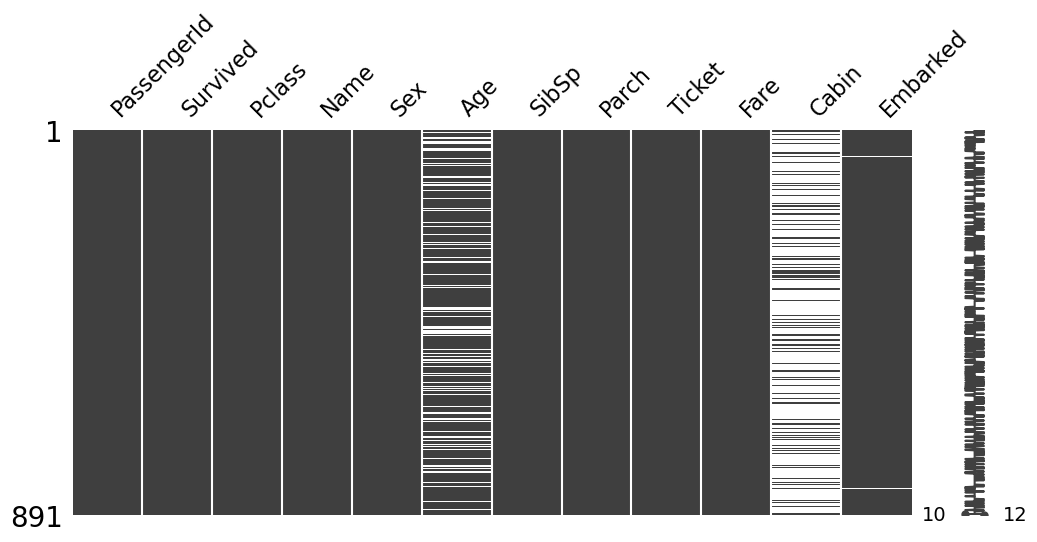

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

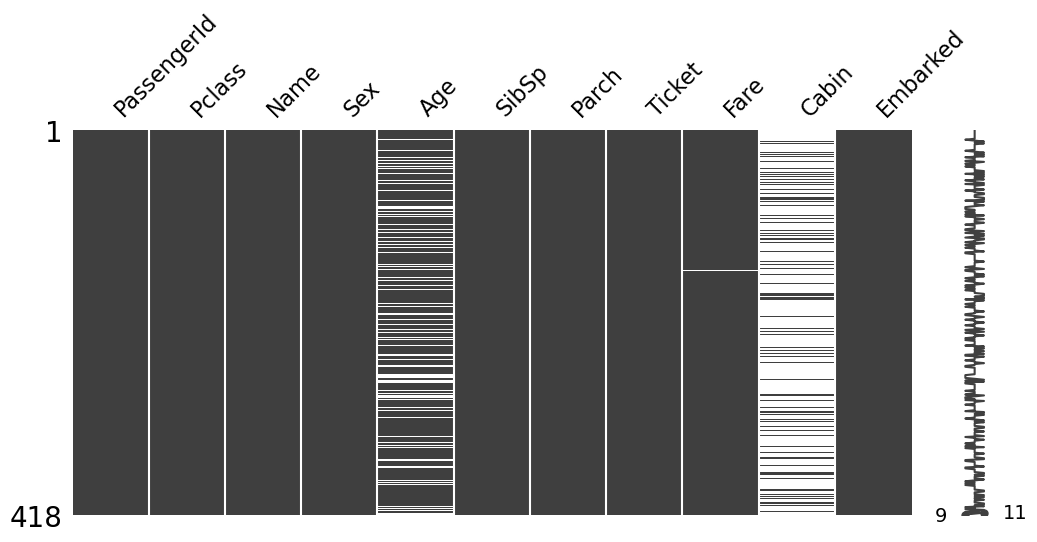

In [12]:
# Missing values visualization
msno.matrix(train_data, figsize=(12,5))
msno.matrix(test_data, figsize=(12,5))

Overall Survival Rate

Text(0, 0.5, 'Survival Rate')

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

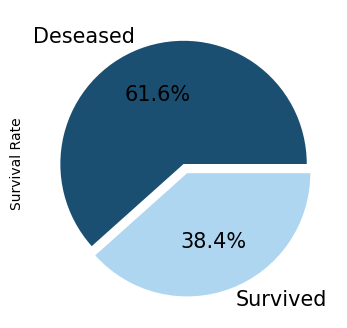

In [13]:
# Overall Survival Rate
train_data['Survived'].value_counts()

plt.figure(figsize=(6,4))
labels = ['Deseased', 'Survived']
colors = ['#1B4F72', '#AED6F1']

train_data['Survived'].value_counts().plot.pie(explode=[0, 0.08],
                                              autopct='%1.1f%%',
                                              labels=labels,
                                              textprops={'fontsize': 15},
                                              colors=colors)
plt.ylabel('Survival Rate')

Survival Count / Rates by Gender

AttributeError: 'numpy.int64' object has no attribute 'startswith'

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

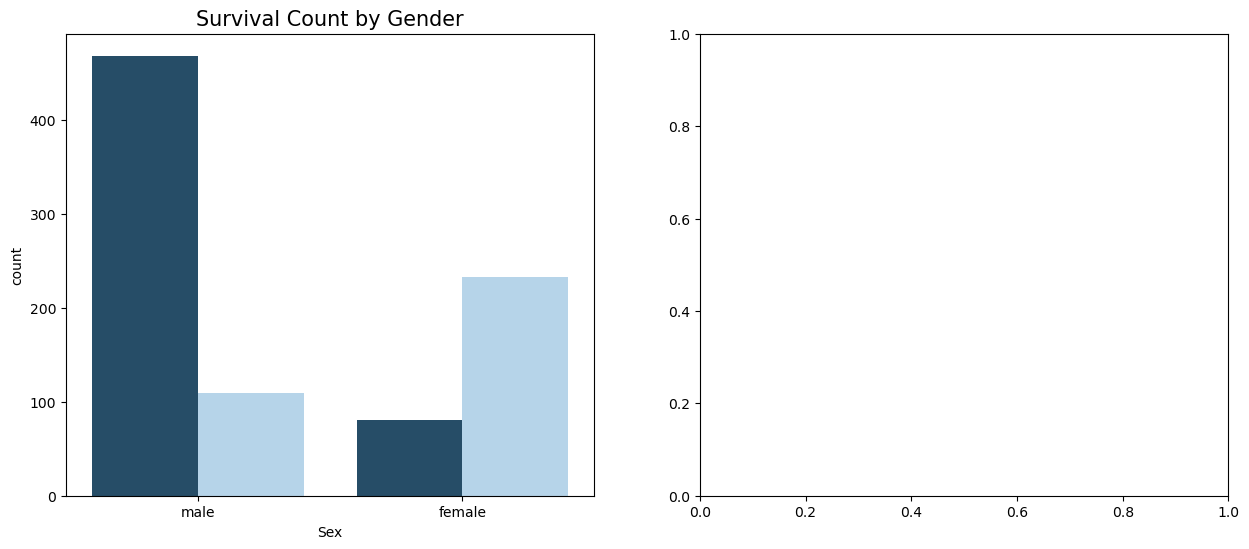

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title("Survival Count by Gender", size=15)
sns.countplot(x="Sex", hue="Survived", data=train_data, ax=axes[0], palette=['#1B4F72', '#AED6F1'], order=['male', 'female'])
axes[0].legend(labels=['Deceased', 'Survived'])

# Right - Survival Rates
gender_survival_rate = train_data.groupby('Sex')['Survived'].value_counts(normalize=True).reset_index(name='proportion')

sns.barplot(x='Sex', y='proportion', hue='Survived', data=gender_survival_rate, ax=axes[1], order=['male', 'female'], palette=['#1B4F72', '#AED6F1'])

for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2.,
                     height + 0.01,
                     f'{height:.1%}',
                     ha="center",
                     fontsize=12)

axes[1].set_title('Survival Rate by Gender', fontsize=15)
axes[1].set_ylabel('Rate', fontsize=12)
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylim(0, 1.0)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['Deceased', 'Survived'])

plt.tight_layout()
plt.show()

Survival Count / Rates by Age Group

In [ ]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

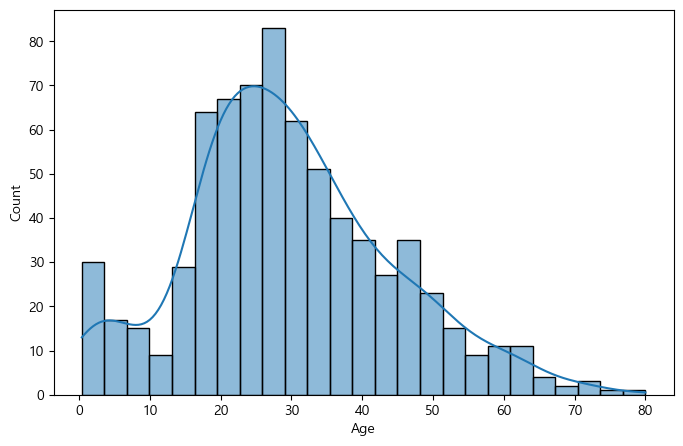

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Age'], bins=25, kde=True)

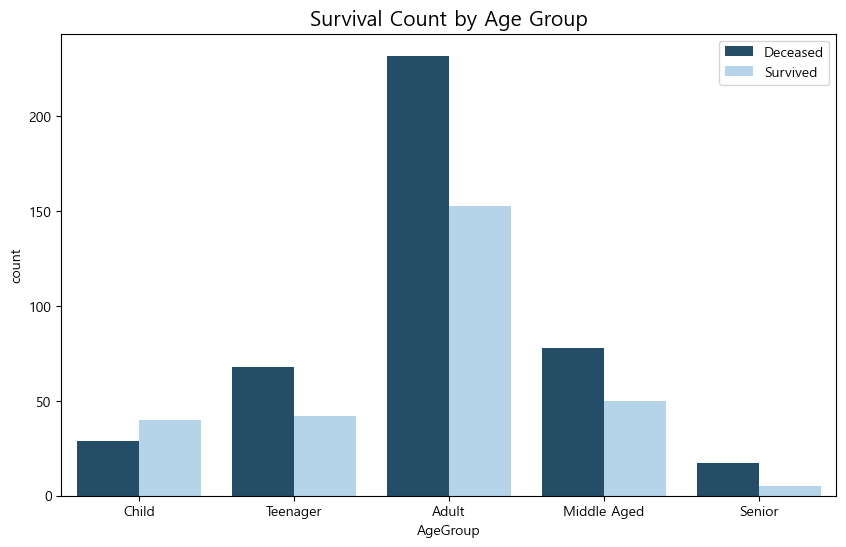

In [ ]:
# Survival Count by Age Group
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle Aged', 'Senior'])

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AgeGroup', hue='Survived', data=train_data, palette=['#1B4F72', '#AED6F1'])
ax.set_title('Survival Count by Age Group', fontsize=15)
ax.legend(labels=['Deceased', 'Survived'])
plt.show()

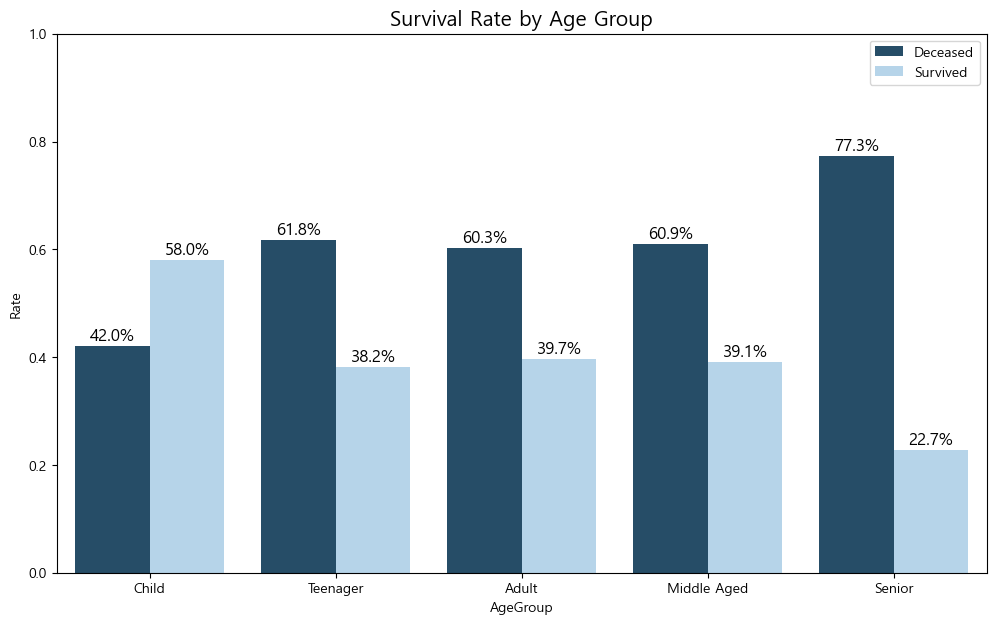

In [ ]:
# Survival Rates by Age Group
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle Aged', 'Senior'])

age_survival_rate = train_data.groupby('AgeGroup')['Survived'].value_counts(normalize=True).reset_index(name='proportion')

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='AgeGroup', y='proportion', hue='Survived', data=age_survival_rate, palette=['#1B4F72', '#AED6F1'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.01,
                f'{height:.1%}',
                ha="center",
                fontsize=12)

ax.set_title('Survival Rate by Age Group', fontsize=15)
ax.set_ylabel('Rate')
ax.set_ylim(0, 1.0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Deceased', 'Survived'])

plt.show()

Survival info. by PClass (Ticket Class)

In [ ]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


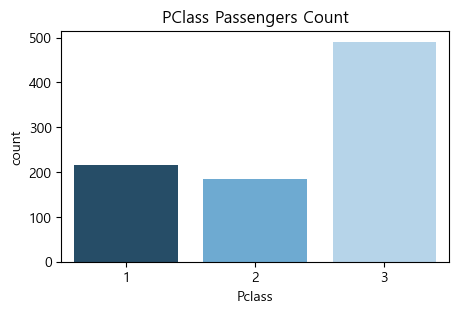

In [ ]:
# Total passengers of each PClass
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=train_data, x='Pclass',
                   palette=['#1B4F72', '#5DADE2', '#AED6F1'])

ax.set_title("PClass Passengers Count", size=12)
plt.show()

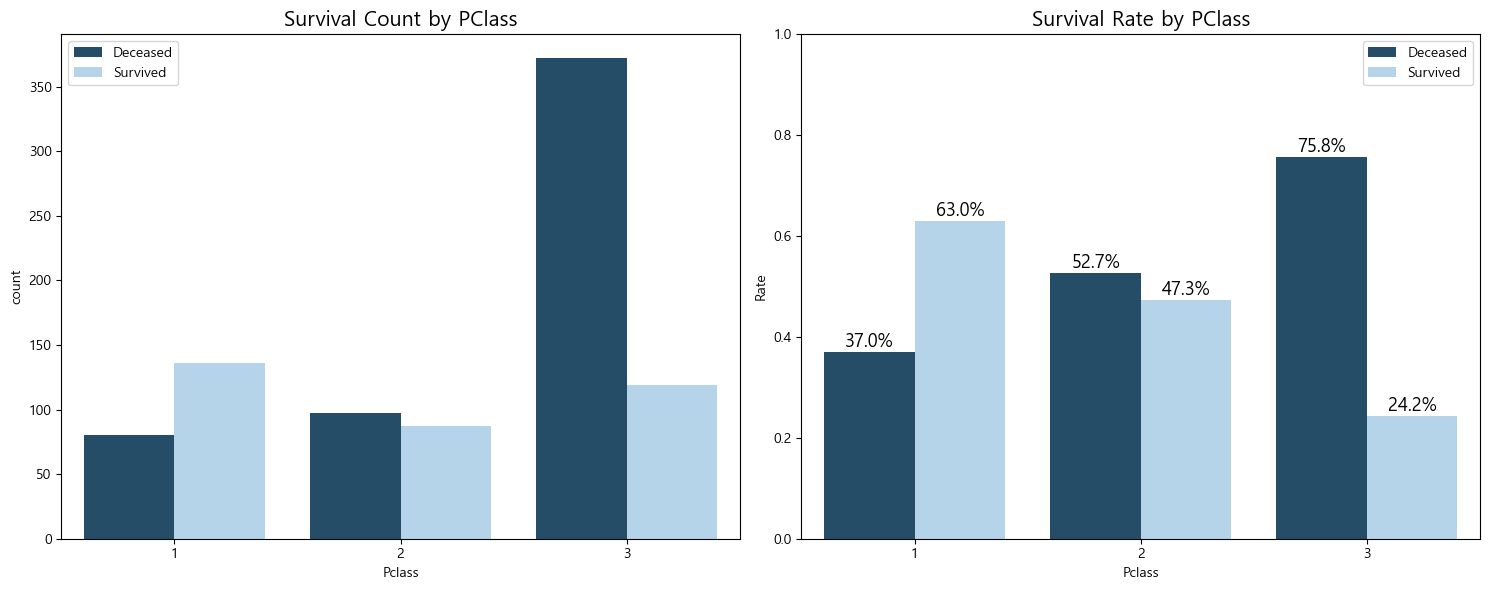

In [ ]:
# Survival Count / Rates by PClass

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left - Survival Count
axes[0].set_title("Survival Count by PClass", size=15)
sns.countplot(x="Pclass", hue="Survived", data=train_data, ax=axes[0], palette=['#1B4F72', '#AED6F1'])
axes[0].legend(labels=['Deceased', 'Survived'])

# Right - Survival Rates
pclass_survival_rate = train_data.groupby('Pclass')['Survived'].value_counts(normalize=True).reset_index(name='proportion')
sns.barplot(x='Pclass', y='proportion', hue='Survived', data=pclass_survival_rate, ax=axes[1], palette=['#1B4F72', '#AED6F1'])

for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2.,
                     height + 0.01,
                     f'{height:.1%}',
                     ha="center",
                     fontsize=13)

axes[1].set_title("Survival Rate by PClass", size=15)
axes[1].set_ylabel("Rate")
axes[1].set_ylim(0, 1.0)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['Deceased', 'Survived'])


plt.tight_layout()
plt.show()

Fare distribution by Survival Status

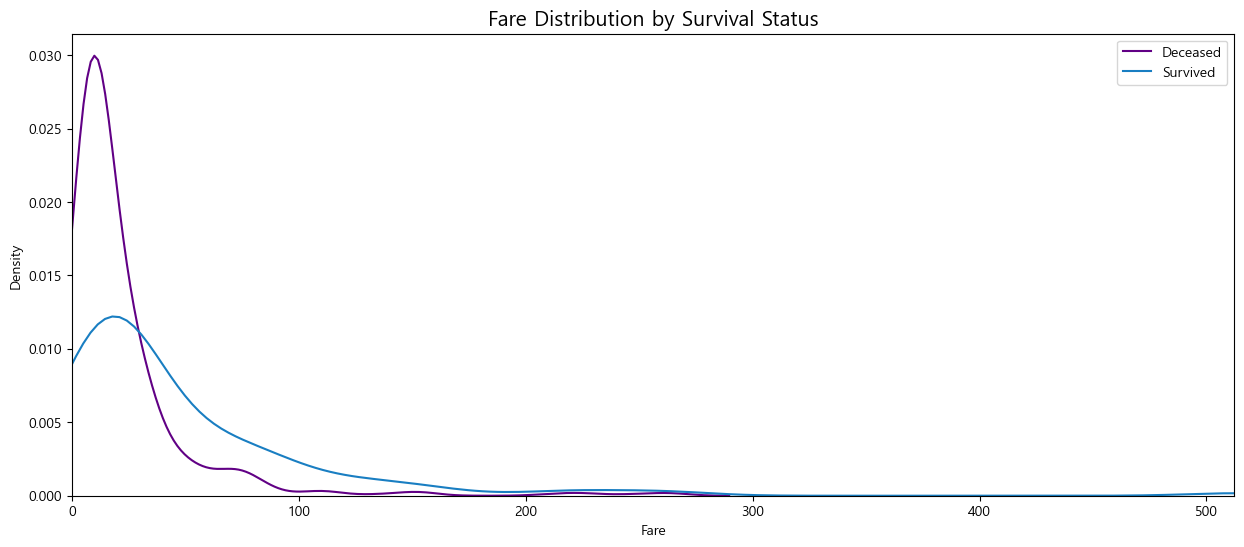

In [ ]:
# Fare distribution by Survival Status
fig, ax = plt.subplots(figsize=(15,6))

sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax, color='#610085', label='Deceased')
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax, color='#197EC2', label='Survived')

ax.set(xlim=(0, train_data['Fare'].max()))
ax.set_title('Fare Distribution by Survival Status', fontsize=15)
ax.legend()
plt.show()

Survival Count / Rates by FamilyStatus (SibSp/Parch)

 - SibSp - 함께 탑승한 형제자매, 배우자 수 총합
 - Parch - 함께 탑승한 부모, 자녀 수 총합  

In [ ]:
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
train_data[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


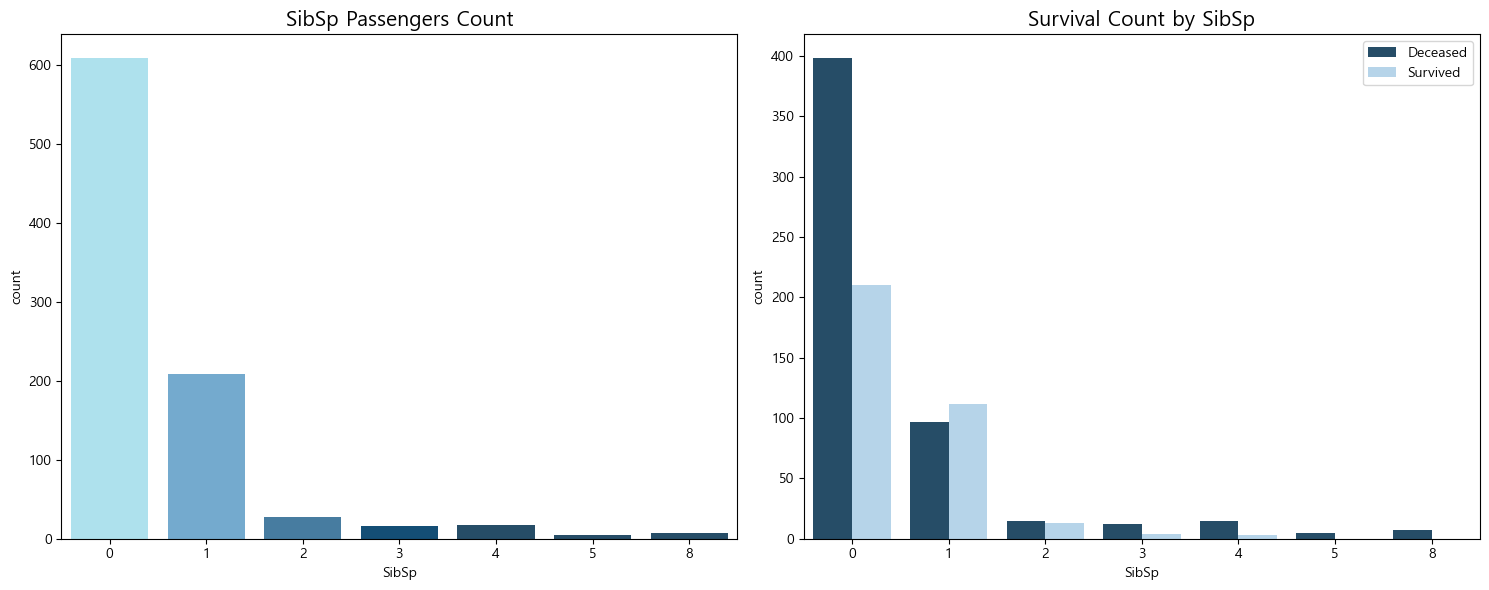

In [ ]:
# Survival Count by SibSp
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left - Total Passengers by SibSp
axes[0].set_title("SibSp Passengers Count", size=15)
sns.countplot(x="SibSp", data=train_data, ax=axes[0], palette=["#A4E8F7", "#65ADDD", "#387FAF", "#045185", '#1B4F72', '#1B4F72', '#1B4F72'])

# Right - Survival Count by SibSp
axes[1].set_title("Survival Count by SibSp", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train_data, ax=axes[1], palette=['#1B4F72', '#AED6F1'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['Deceased', 'Survived'])

plt.tight_layout()
plt.show()

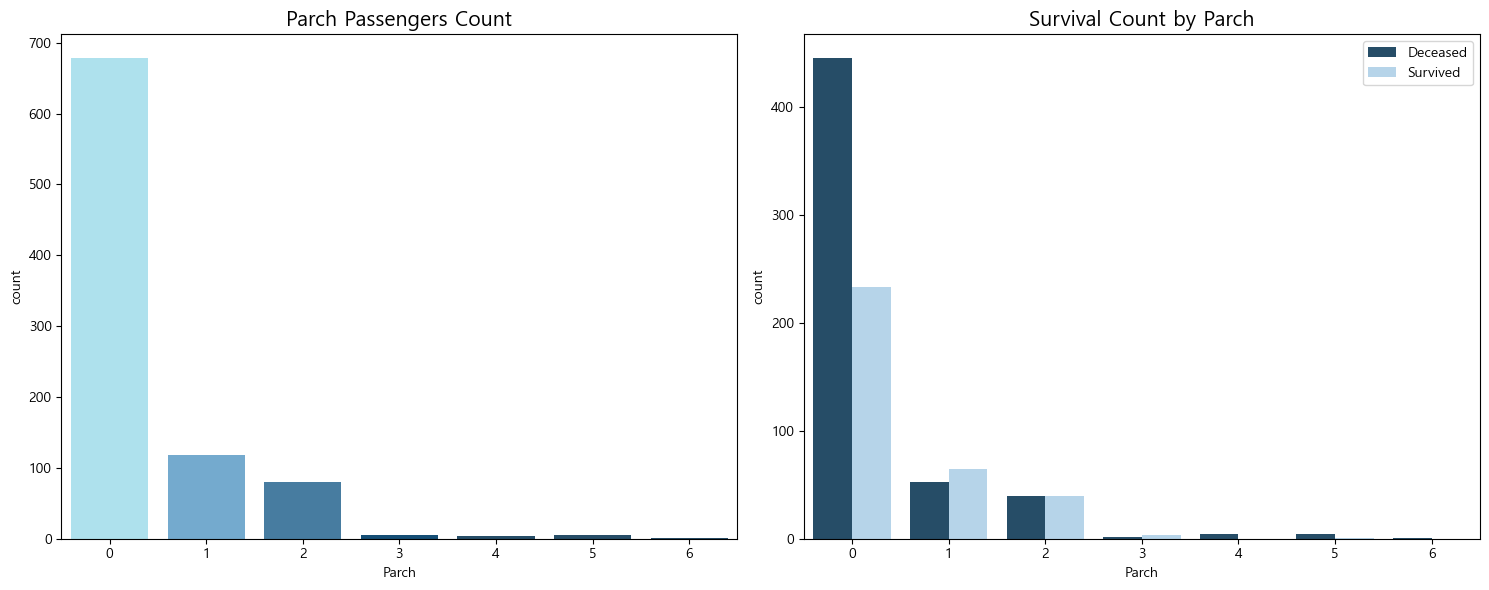

In [ ]:
# Survival Count by Parch
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left - Total Parch Passengers
axes[0].set_title("Parch Passengers Count", size=15)
sns.countplot(x="Parch", data=train_data, ax=axes[0], palette=["#A4E8F7", "#65ADDD", "#387FAF", "#045185", '#1B4F72', '#1B4F72', '#1B4F72'])

# Right - Survival Count by Parch
axes[1].set_title("Survival Count by Parch", size=15)
sns.countplot(x="Parch", hue="Survived", data=train_data, ax=axes[1], palette=['#1B4F72', '#AED6F1'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['Deceased', 'Survived'])

plt.tight_layout()
plt.show()

# Step 4. Feature Engineering

In [ ]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

dataset = pd.concat([train_data, test_data], sort=False).reset_index(drop=True)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Embarked null

In [ ]:
dataset['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [ ]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
dataset['Embarked'].fillna('S', inplace=True)

### Fare null

In [ ]:
dataset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
dataset['Fare'].groupby(dataset['Pclass']).mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [ ]:
dataset.loc[1043, 'Fare'] = 13.3028

In [ ]:
dataset['Age'] = dataset['Age'].groupby([dataset['Pclass'], dataset['Sex']]).transform(lambda x: x.fillna(x.mean()))

In [ ]:
dataset['LastName'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
dataset['Survived'].groupby(dataset['LastName']).mean()

LastName
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [ ]:
dataset['LastName'].value_counts()

LastName
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [ ]:
dataset['LastName'] = dataset['LastName'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', 'Don', 'Sir', 'Jonkheer'], 'Mr')
dataset['LastName'] = dataset['LastName'].replace(['Ms', 'Mlle'], 'Miss')
dataset['LastName'] = dataset['LastName'].replace(['Mme', 'Lady', 'Countess', 'Dona'], 'Mrs')
dataset['LastName'].value_counts()

LastName
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [ ]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
dataset['TicketFreq'] = dataset.groupby('Ticket')['Ticket'].transform('count')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FamilySize,TicketFreq
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,1,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.962264,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs,0,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.962264,0,0,359309,8.0500,NaN,S,Mr,0,1


In [ ]:
dataset.loc[dataset['FamilySize'] == 0, 'Solo'] = 1
dataset.loc[dataset['TicketFreq'] == 1, 'Solo'] = 1
dataset['Solo'] = dataset['Solo'].fillna(0)

dataset['Fare'] = pd.qcut(dataset['Fare'], 9, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
dataset['Age'] = pd.qcut(dataset['Age'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

dataset = pd.concat([dataset, pd.get_dummies(dataset['Sex'])], axis=1)
dataset.rename(columns={'male': 'Male', 'female':'Female'}, inplace=True)

dataset = pd.concat([dataset, pd.get_dummies(dataset['Embarked'], prefix='Embarked')], axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['LastName'])], axis=1)

dataset = dataset.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked', 'LastName'])

In [ ]:
dataset['FamilySize'] = pd.cut(dataset['FamilySize'], bins=[-1, 0, 1, 4, 10], labels=[0, 1, 2, 3])
dataset['Survived'].groupby(dataset['TicketFreq']).mean()

TicketFreq
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

In [ ]:
dataset['TicketFreq'] = pd.cut(dataset['TicketFreq'], bins=[0, 1, 2, 4, 20], labels=[0, 1, 2, 3])
dataset['TicketFreq'].value_counts()

TicketFreq
0    713
1    264
2    211
3    121
Name: count, dtype: int64

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Age              0
Fare             0
FamilySize       0
TicketFreq       0
Solo             0
Female           0
Male             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Master           0
Miss             0
Mr               0
Mrs              0
dtype: int64

In [ ]:
scaler = MinMaxScaler()
# PassengerId 제외하고 정규화
dataset[list(dataset.columns.difference(['PassengerId']))] = scaler.fit_transform(dataset[list(dataset.columns.difference(['PassengerId']))])

In [ ]:
labels = dataset.loc[:890, 'Survived']
dataset = dataset.drop(columns = 'Survived')
features = dataset.iloc[:891, :]
features.drop('PassengerId', axis=1, inplace=True)
test_dataset = dataset.iloc[891:, :]
feature_names = features.columns.values

# Step 5.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(len(features), len(labels))

891 891


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7821229050279329
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       105
         1.0       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

Logistic Regression Confusion Matrix:
 [[84 21]
 [18 56]]


In [ ]:
test_dataset['PassengerId'] = test_dataset['PassengerId'].astype(int)

submission = pd.DataFrame({
    "PassengerId": test_dataset["PassengerId"],
    "Survived": lr.predict(test_dataset.drop('PassengerId', axis=1)).astype(int)
    })
submission.to_csv('./submission/lr_liblinear_submission.csv', index=False)

<img src="./images/lr_liblinear_submission.png" />

In [ ]:
coefficients = lr.coef_[0]   # 이진 분류의 경우 (클래스 1 방향의 계수)
feature_names = test_dataset.columns
# feature와 계수 매핑
coef_df = pd.DataFrame({
    "feature": feature_names.drop('PassengerId'),
    "coefficient": abs(coefficients)
}).sort_values(by="coefficient", ascending=False)

print(coef_df)

       feature  coefficient
0       Pclass     1.650438
13          Mr     1.417935
11      Master     1.350950
3   FamilySize     1.296261
6       Female     1.109996
14         Mrs     0.994681
8   Embarked_C     0.688141
4   TicketFreq     0.491998
2         Fare     0.482224
1          Age     0.322622
9   Embarked_Q     0.316473
5         Solo     0.263341
12        Miss     0.115316
7         Male     0.066984
10  Embarked_S     0.038397


In [ ]:
lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7877094972067039
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       105
         1.0       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179

Logistic Regression Confusion Matrix:
 [[84 21]
 [17 57]]


In [ ]:
test_dataset['PassengerId'] = test_dataset['PassengerId'].astype(int)

submission = pd.DataFrame({
    "PassengerId": test_dataset["PassengerId"],
    "Survived": lr2.predict(test_dataset.drop('PassengerId', axis=1)).astype(int)
    })
submission.to_csv('./submission/lr_libfgs_submission.csv', index=False)

<img src="./images/lr_libfgs_submission.png" />

In [ ]:
coefficients = lr2.coef_[0]   # 이진 분류의 경우 (클래스 1 방향의 계수)
feature_names = test_dataset.columns
# feature와 계수 매핑
coef_df = pd.DataFrame({
    "feature": feature_names.drop('PassengerId'),
    "coefficient": abs(coefficients)
}).sort_values(by="coefficient", ascending=False)

print(coef_df)

       feature  coefficient
0       Pclass     1.818513
13          Mr     1.701517
3   FamilySize     1.395718
11      Master     1.121153
14         Mrs     0.749578
6       Female     0.594508
7         Male     0.580363
4   TicketFreq     0.488910
1          Age     0.394797
5         Solo     0.392406
8   Embarked_C     0.342000
10  Embarked_S     0.313946
2         Fare     0.249575
12        Miss     0.155070
9   Embarked_Q     0.013909


In [ ]:
lr3 = LogisticRegression(solver='saga')
lr3.fit(X_train, y_train)
y_pred = lr3.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7877094972067039
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       105
         1.0       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179

Logistic Regression Confusion Matrix:
 [[84 21]
 [17 57]]


In [ ]:
test_dataset['PassengerId'] = test_dataset['PassengerId'].astype(int)

submission = pd.DataFrame({
    "PassengerId": test_dataset["PassengerId"],
    "Survived": lr3.predict(test_dataset.drop('PassengerId', axis=1)).astype(int)
    })
submission.to_csv('./submission/lr_saga_submission.csv', index=False)

<img src="./images/lr_saga_submission.png" />

In [ ]:
coefficients = lr3.coef_[0]   # 이진 분류의 경우 (클래스 1 방향의 계수)
feature_names = test_dataset.columns
# feature와 계수 매핑
coef_df = pd.DataFrame({
    "feature": feature_names.drop('PassengerId'),
    "coefficient": abs(coefficients)
}).sort_values(by="coefficient", ascending=False)

print(coef_df)

       feature  coefficient
0       Pclass     1.816060
13          Mr     1.702924
3   FamilySize     1.394249
11      Master     1.117443
14         Mrs     0.747858
6       Female     0.590513
7         Male     0.585481
4   TicketFreq     0.488658
1          Age     0.396768
5         Solo     0.388337
8   Embarked_C     0.337839
10  Embarked_S     0.317398
2         Fare     0.257513
12        Miss     0.157345
9   Embarked_Q     0.015409


In [ ]:
# ===== 멀티코어/스레드 환경 변수 =====
import os
CPU = os.cpu_count() or 1
for k in ["OMP_NUM_THREADS","OPENBLAS_NUM_THREADS","MKL_NUM_THREADS","VECLIB_MAXIMUM_THREADS","NUMEXPR_NUM_THREADS"]:
    os.environ[k] = str(CPU)

import sys, time, math, random, warnings, itertools, io
import multiprocessing as mp
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# ==== 출력 단일화 가드 ====
_orig_print = print
def _is_main_process() -> bool:
    try:
        return mp.current_process().name == "MainProcess"
    except Exception:
        return True

def print(*a, **k):  # 모든 print를 메인 프로세스에서만
    if _is_main_process():
        _orig_print(*a, **k)

# tqdm 고정: iterable=None도 허용 + 워커 출력 비활성화
from tqdm.auto import tqdm as _tqdm
def TQDM(iterable=None, **kw):
    cfg = dict(file=sys.stdout, ncols=90, mininterval=0.3, leave=True, dynamic_ncols=True,
               disable=not _is_main_process())
    if iterable is None:
        return _tqdm(**{**cfg, **kw})
    return _tqdm(iterable, **{**cfg, **kw})

from concurrent.futures import ProcessPoolExecutor, as_completed
from concurrent.futures import ThreadPoolExecutor

# ===== 설정 =====
SEED = 42

# Decision Tree (Random Search, 병렬)
N_DT_SAMPLES = 120
DT_MAX_DEPTH_RANGE = (2, 40)
DT_MIN_SPLIT_RANGE = (2, 40)
DT_MIN_LEAF_RANGE = (1, 20)
DT_CRITERIA = ["gini", "entropy", "log_loss"]
DT_SPLITTERS = ["best", "random"]
DT_USE_NONE_DEPTH_PROB = 0.15

# Random Forest (Random Search, 내부 멀티코어 사용)
N_RF_SAMPLES = 160
RF_N_EST_RANGE = (100, 2000)
RF_MAX_DEPTH_RANGE = (2, 50)
RF_MIN_SPLIT_RANGE = (2, 30)
RF_MIN_LEAF_RANGE = (1, 20)
RF_MAX_FEATURES_CHOICES = ["sqrt", "log2", None, "float"]
RF_MAX_FEATURES_FLOAT_RANGE = (0.2, 1.0)
RF_BOOTSTRAP_CHOICES = [True, False]
RF_CLASS_WEIGHT_CHOICES = [None, "balanced"]

# SVM (Random Search, 병렬; 탐색 probability=False, 최종만 True)
N_SVM_SAMPLES_PER_KERNEL = 100
SVM_KERNELS = ["rbf", "linear", "poly", "sigmoid"]
SVM_C_LOG_RANGE = (-3, 3)
SVM_GAMMA_LOG_RANGE = (-4, 1)
SVM_DEGREE_RANGE = (2, 5)
SVM_COEF0_RANGE = (-1.0, 1.0)

# BO for RF (수동 GP+EI; 순차, 내부 RF는 n_jobs=CPU)
BO_INIT_SAMPLES = 12
BO_MAX_ITERS = 40
BO_EARLY_STOP_PATIENCE = 10
BO_IMPROVEMENT_TOL = 1e-4
BO_N_CANDIDATES = 800
BO_BOUNDS_LO = np.array([100,  2,  2, 0.2], dtype=float)  # (n_estimators, max_depth, min_samples_split, max_features_float)
BO_BOUNDS_HI = np.array([2000, 50, 30, 1.0], dtype=float)

# MLP (Random Search; GPU 단일 프로세스)
RUN_MLP = True
N_MLP_SAMPLES = 16
MLP_HIDDEN_RANGE = (64, 512)
MLP_DROPOUT_RANGE = (0.0, 0.5)
MLP_LR_LOG_RANGE = (-4, -2.5)
MLP_EPOCHS_RANGE = (120, 220)
MLP_BATCH_CHOICES = [32, 64, 128]
MLP_EARLY_STOP_PATIENCE = 20

# 앙상블 가중치 (None=균등)
ENSEMBLE_WEIGHTS = None

# ===== sklearn / torch =====
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as CK, WhiteKernel
from scipy.stats import norm

try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    TORCH_OK = True
except Exception:
    TORCH_OK = False

# ===== 재현성 =====
np.random.seed(SEED); random.seed(SEED)
if TORCH_OK:
    try:
        torch.manual_seed(SEED)
        if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)
    except Exception: pass

os.makedirs("./submission", exist_ok=True)

# ===== 데이터/피처 =====
def build_features_from_raw():
    train_data = pd.read_csv('./data/train.csv')
    test_data  = pd.read_csv('./data/test.csv')

    dataset = pd.concat([train_data, test_data], sort=False).reset_index(drop=True)

    dataset['Embarked'].fillna('S', inplace=True)
    if dataset['Fare'].isnull().any():
        if 1043 in dataset.index: dataset.loc[1043, 'Fare'] = 13.3028
        dataset['Fare'] = dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('mean'))

    dataset['Age'] = dataset['Age'].groupby([dataset['Pclass'], dataset['Sex']]).transform(lambda x: x.fillna(x.mean()))

    dataset['LastName'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    dataset['LastName'] = dataset['LastName'].replace(['Capt','Col','Dr','Major','Rev','Don','Sir','Jonkheer'],'Mr')
    dataset['LastName'] = dataset['LastName'].replace(['Ms','Mlle'],'Miss')
    dataset['LastName'] = dataset['LastName'].replace(['Mme','Lady','Countess','Dona'],'Mrs')

    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    dataset['TicketFreq'] = dataset.groupby('Ticket')['Ticket'].transform('count')
    dataset.loc[dataset['FamilySize'] == 0, 'Solo'] = 1
    dataset.loc[dataset['TicketFreq'] == 1, 'Solo'] = 1
    dataset['Solo'] = dataset['Solo'].fillna(0)

    dataset['Fare'] = pd.qcut(dataset['Fare'], 9, labels=[1,2,3,4,5,6,7,8,9])
    dataset['Age']  = pd.qcut(dataset['Age'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

    dataset = pd.concat([dataset, pd.get_dummies(dataset['Sex'])], axis=1)
    dataset.rename(columns={'male':'Male','female':'Female'}, inplace=True)
    dataset = pd.concat([dataset, pd.get_dummies(dataset['Embarked'], prefix='Embarked')], axis=1)
    dataset = pd.concat([dataset, pd.get_dummies(dataset['LastName'])], axis=1)

    dataset = dataset.drop(columns=['Name','Sex','Ticket','Cabin','SibSp','Parch','Embarked','LastName'])

    dataset['FamilySize'] = pd.cut(dataset['FamilySize'], bins=[-1,0,1,4,10], labels=[0,1,2,3])
    dataset['TicketFreq'] = pd.cut(dataset['TicketFreq'], bins=[0,1,2,4,20], labels=[0,1,2,3])

    scaler = MinMaxScaler()
    scale_cols = list(dataset.columns.difference(['PassengerId','Survived']))
    dataset[scale_cols] = scaler.fit_transform(dataset[scale_cols])

    labels   = dataset.loc[:890, 'Survived']
    features = dataset.iloc[:891, :].drop(columns='Survived')
    test_ds  = dataset.iloc[891:, :].copy()
    test_ds  = test_ds.drop(columns='Survived', errors='ignore')
    test_ds['PassengerId'] = test_ds['PassengerId'].astype(int)

    X_tr, X_val, y_tr, y_val = train_test_split(
        features.drop(columns='PassengerId'), labels, test_size=0.2, random_state=SEED, stratify=labels
    )
    return features, labels, X_tr, X_val, y_tr, y_val, test_ds

def _prep_test_X(df):
    cols_to_drop = [c for c in ['PassengerId','Survived'] if c in df.columns]
    return df.drop(columns=cols_to_drop)

def sigmoid(x): return 1.0/(1.0+np.exp(-x))
def prob_to_logit(p, eps=1e-9):
    p = np.clip(p, eps, 1-eps); return np.log(p/(1-p))
def rand_log_uniform(a, b):  # return 10**u, u~U(a,b)
    return float(10 ** np.random.uniform(a, b))

def evaluate_and_submit(model_name, model, Xtr, ytr, Xva, yva, test_df, submit_stem, want_proba=True):
    t0 = time.time(); model.fit(Xtr, ytr); train_secs = time.time()-t0
    val_pred_hard = model.predict(Xva)
    val_acc = accuracy_score(yva, val_pred_hard)
    if want_proba and hasattr(model, "predict_proba"):
        val_p = model.predict_proba(Xva)[:, list(model.classes_).index(1)]
        test_p = model.predict_proba(_prep_test_X(test_df))[:, list(model.classes_).index(1)]
    elif want_proba and hasattr(model, "decision_function"):
        val_p = sigmoid(model.decision_function(Xva))
        test_p = sigmoid(model.decision_function(_prep_test_X(test_df)))
        if np.ndim(val_p)>1: val_p = val_p.ravel()
        if np.ndim(test_p)>1: test_p = test_p.ravel()
    else:
        val_p = val_pred_hard.astype(float)
        test_p = model.predict(_prep_test_X(test_df)).astype(float)
    sub = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': (test_p>=0.5).astype(int)})
    sub_path = f'./submission/{submit_stem}.csv'; sub.to_csv(sub_path, index=False)
    return {
        'Model': model_name,
        'ValAccuracy': float(val_acc),
        'TrainSeconds': round(train_secs, 3),
        'BestParams': getattr(model, 'get_params', lambda: {})(),
        'SubmissionPath': sub_path,
        'val_prob': val_p, 'test_prob': test_p,
        'val_logit': prob_to_logit(val_p), 'test_logit': prob_to_logit(test_p),
    }

def expected_improvement(mu, sigma, y_best, xi=0.01):
    Z = (mu - y_best - xi) / (sigma + 1e-12)
    return (mu - y_best - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)

def run_booster_models(X_train, y_train, X_test, y_test, X_full_train, y_full_train, test_df):
    """ LightGBM, XGBoost, CatBoost 모델을 학습/평가하고 결과를 반환합니다. """
    try:
        from lightgbm import LGBMClassifier
        from xgboost import XGBClassifier
        from catboost import CatBoostClassifier
    except ImportError as e:
        print(f"부스팅 라이브러리 import 실패: {e}. 해당 모델은 건너뜁니다.")
        return []

    booster_results = []
    models_to_run = {
        'LightGBM': LGBMClassifier(random_state=SEED, verbosity=-1),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED),
        'CatBoost': CatBoostClassifier(verbose=0, random_state=SEED),
    }

    print("\n[INFO] Training Gradient Boosting Models...")
    for name, model in TQDM(models_to_run.items(), desc="Running Boosters"):
        # 1. 검증 데이터로 성능 측정 및 확률값 추출
        model.fit(X_train, y_train)
        val_acc = accuracy_score(y_test, model.predict(X_test))
        val_p = model.predict_proba(X_test)[:, 1]

        # 2. 전체 학습 데이터로 재학습 후 테스트 데이터 예측
        t0 = time.time()
        model.fit(X_full_train, y_full_train)
        train_secs = time.time() - t0
        test_p = model.predict_proba(_prep_test_X(test_df))[:, 1]

        # 3. 제출 파일 생성
        sub_path = f'./submission/{name.lower()}_submission.csv'
        pd.DataFrame({
            'PassengerId': test_df['PassengerId'],
            'Survived': (test_p >= 0.5).astype(int)
        }).to_csv(sub_path, index=False)
        
        # 4. 결과 저장을 위한 딕셔너리 생성
        res = {
            'Model': name, 'ValAccuracy': float(val_acc), 'TrainSeconds': round(train_secs, 3),
            'BestParams': {'default_params': True}, 'SubmissionPath': sub_path,
            'val_prob': val_p, 'test_prob': test_p,
            'val_logit': prob_to_logit(val_p), 'test_logit': prob_to_logit(test_p),
        }
        booster_results.append(res)
        
    return booster_results

def print_final_summary(results, members, y_test, test_dataset, ensemble_weights=None):
    """ 모든 모델 학습 완료 후 최종 결과 요약 테이블을 출력합니다. """
    if not members:
        print("\n[WARNING] No models were successfully trained. Skipping final summary.")
        return

    # 앙상블 계산
    names = [m['Model'] for m in members]
    w = np.array([1.0 if not ensemble_weights or n not in ensemble_weights else float(ensemble_weights[n]) for n in names], dtype=float)
    w = w / w.sum() if w.sum() != 0 else np.full_like(w, 1.0/len(w))
    
    val_stack = np.stack([m['val_prob'] for m in members], axis=1)
    test_stack = np.stack([m['test_prob'] for m in members], axis=1)
    
    val_ens_prob = (val_stack * w.reshape(1, -1)).sum(axis=1)
    test_ens_prob = (test_stack * w.reshape(1, -1)).sum(axis=1)
    
    val_ens_acc = accuracy_score(y_test, (val_ens_prob >= 0.5).astype(int))
    
    ens_path = './submission/ensemble_softvote_submission.csv'
    pd.DataFrame({
        'PassengerId': test_dataset['PassengerId'],
        'Survived': (test_ens_prob >= 0.5).astype(int)
    }).to_csv(ens_path, index=False)

    # 개별 모델 결과 테이블 생성
    summary_rows = []
    for r in results:
        params_str = str(r['BestParams'])
        if len(params_str) > 70:
            params_str = params_str[:67] + '...'
        summary_rows.append([r['Model'], f"{r['ValAccuracy']:.4f}", params_str])
        
    summary_df = pd.DataFrame(summary_rows, columns=['Model', 'ValAcc', 'BestParams'])
    
    # 앙상블 결과 추가
    ensemble_row = pd.DataFrame([['Ensemble (Soft Vote)', f'{val_ens_acc:.4f}', str(dict(zip(names, np.round(w, 3))))]], columns=['Model', 'ValAcc', 'BestParams'])
    summary_df = pd.concat([ensemble_row, summary_df], ignore_index=True)
    
    summary_df = summary_df.sort_values('ValAcc', ascending=False).reset_index(drop=True)

    print("\n" + "="*25 + " FINAL RESULTS " + "="*25)
    print(summary_df.to_string(index=False))
    print("="*67)
    print(f"\nEnsemble submission saved to: {ens_path}")
    
    summary_df.to_csv('./submission/model_eval_summary.csv', index=False)

# ===== 병렬 평가용 워커 =====
_GLOBAL = {}
def _init_worker(Xtr, ytr, Xva, yva):
    global _GLOBAL
    _GLOBAL['Xtr'] = Xtr; _GLOBAL['ytr'] = ytr; _GLOBAL['Xva'] = Xva; _GLOBAL['yva'] = yva

def _eval_dt(params):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    Xtr=_GLOBAL['Xtr']; ytr=_GLOBAL['ytr']; Xva=_GLOBAL['Xva']; yva=_GLOBAL['yva']
    m = DecisionTreeClassifier(**params)
    m.fit(Xtr, ytr)
    acc = accuracy_score(yva, m.predict(Xva))
    return acc, params

def _eval_svm(params):
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    Xtr=_GLOBAL['Xtr']; ytr=_GLOBAL['ytr']; Xva=_GLOBAL['Xva']; yva=_GLOBAL['yva']
    m = SVC(**params)
    m.fit(Xtr, ytr)
    acc = accuracy_score(yva, m.predict(Xva))
    return acc, params

# ======================= 메인 실행부 =======================
def main():
    results = []
    members = []

    print(f"[PLAN] DT={N_DT_SAMPLES}, RF(rand)={N_RF_SAMPLES}, SVM(total)={N_SVM_SAMPLES_PER_KERNEL*len(SVM_KERNELS)}, RF(BO)={BO_INIT_SAMPLES+BO_MAX_ITERS}, MLP={(N_MLP_SAMPLES if RUN_MLP and TORCH_OK else 0)}")
    os.makedirs("./submission", exist_ok=True)

    # ===== 데이터 준비 =====
    features, labels, X_train, X_test, y_train, y_test, test_dataset = build_features_from_raw()

    # ---------- Decision Tree (Random Search, 멀티프로세스) ----------
    dt_param_list = []
    rng = np.random.default_rng(SEED)
    for _ in range(N_DT_SAMPLES):
        max_depth = None if rng.random()<DT_USE_NONE_DEPTH_PROB else int(rng.integers(DT_MAX_DEPTH_RANGE[0], DT_MAX_DEPTH_RANGE[1]+1))
        dt_param_list.append(dict(
            random_state=SEED,
            criterion=random.choice(DT_CRITERIA),
            splitter=random.choice(DT_SPLITTERS),
            max_depth=max_depth,
            min_samples_split=int(rng.integers(DT_MIN_SPLIT_RANGE[0], DT_MIN_SPLIT_RANGE[1]+1)),
            min_samples_leaf=int(rng.integers(DT_MIN_LEAF_RANGE[0], DT_MIN_LEAF_RANGE[1]+1))
        ))
    best_dt_acc, best_dt_params = -1.0, None
    if os.name == "nt":
        _init_worker(X_train, y_train, X_test, y_test)
        with ThreadPoolExecutor(max_workers=CPU) as ex:
            futures = [ex.submit(_eval_dt, p) for p in dt_param_list]
            for fut in TQDM(as_completed(futures), total=len(futures), desc="DT random search"):
                acc, params = fut.result()
                if acc > best_dt_acc:
                    best_dt_acc, best_dt_params = acc, params
    else:
        with ProcessPoolExecutor(max_workers=CPU, initializer=_init_worker, initargs=(X_train, y_train, X_test, y_test)) as ex:
            futures = [ex.submit(_eval_dt, p) for p in dt_param_list]
            for fut in TQDM(as_completed(futures), total=len(futures), desc="DT random search"):
                acc, params = fut.result()
                if acc > best_dt_acc:
                    best_dt_acc, best_dt_params = acc, params
    if best_dt_params is not None:
        r = evaluate_and_submit("DecisionTree", DecisionTreeClassifier(**best_dt_params), X_train, y_train, X_test, y_test, test_dataset, "dt_submission")
        r['BestParams']=best_dt_params; results.append(r); members.append(r)

    # ---------- Random Forest (Random Search, 내부 멀티코어 n_jobs=CPU) ----------
    best_rf_acc, best_rf_params = -1.0, None
    for _ in TQDM(range(N_RF_SAMPLES), desc="RF random search", total=N_RF_SAMPLES):
        max_features_choice = random.choice(RF_MAX_FEATURES_CHOICES)
        if max_features_choice == "float":
            max_features = float(np.random.uniform(*RF_MAX_FEATURES_FLOAT_RANGE))
        else:
            max_features = max_features_choice
        params = dict(
            random_state=SEED,
            n_estimators=int(np.random.randint(RF_N_EST_RANGE[0], RF_N_EST_RANGE[1]+1)),
            max_depth=int(np.random.randint(RF_MAX_DEPTH_RANGE[0], RF_MAX_DEPTH_RANGE[1]+1)),
            min_samples_split=int(np.random.randint(RF_MIN_SPLIT_RANGE[0], RF_MIN_SPLIT_RANGE[1]+1)),
            min_samples_leaf=int(np.random.randint(RF_MIN_LEAF_RANGE[0], RF_MIN_LEAF_RANGE[1]+1)),
            max_features=max_features,
            bootstrap=random.choice(RF_BOOTSTRAP_CHOICES),
            class_weight=random.choice(RF_CLASS_WEIGHT_CHOICES),
            n_jobs=CPU
        )
        m = RandomForestClassifier(**params)
        m.fit(X_train, y_train)
        acc = accuracy_score(y_test, m.predict(X_test))
        if acc > best_rf_acc:
            best_rf_acc, best_rf_params = acc, params
    if best_rf_params is not None:
        r = evaluate_and_submit("RandomForest(Rand)", RandomForestClassifier(**best_rf_params), X_train, y_train, X_test, y_test, test_dataset, "rf_rand_submission")
        r['BestParams']=best_rf_params; results.append(r); members.append(r)

    # ---------- SVM (Random Search, 멀티프로세스; 탐색 probability=False, 최종만 True) ----------
    svm_param_list = []
    for kernel in SVM_KERNELS:
        for _ in range(N_SVM_SAMPLES_PER_KERNEL):
            C = rand_log_uniform(*SVM_C_LOG_RANGE)
            if kernel == "linear":
                params = dict(C=C, kernel='linear', probability=False, random_state=SEED)
            elif kernel == "rbf":
                gamma = rand_log_uniform(*SVM_GAMMA_LOG_RANGE)
                params = dict(C=C, kernel='rbf', gamma=gamma, probability=False, random_state=SEED)
            elif kernel == "poly":
                gamma = rand_log_uniform(*SVM_GAMMA_LOG_RANGE)
                degree = int(np.random.randint(SVM_DEGREE_RANGE[0], SVM_DEGREE_RANGE[1]+1))
                coef0 = float(np.random.uniform(*SVM_COEF0_RANGE))
                params = dict(C=C, kernel='poly', gamma=gamma, degree=degree, coef0=coef0, probability=False, random_state=SEED)
            else:  # sigmoid
                gamma = rand_log_uniform(*SVM_GAMMA_LOG_RANGE)
                coef0 = float(np.random.uniform(*SVM_COEF0_RANGE))
                params = dict(C=C, kernel='sigmoid', gamma=gamma, coef0=coef0, probability=False, random_state=SEED)
            svm_param_list.append(params)

    best_svm_acc, best_svm_params = -1.0, None
    if os.name == "nt":
        _init_worker(X_train, y_train, X_test, y_test)
        with ThreadPoolExecutor(max_workers=CPU) as ex:
            futures = [ex.submit(_eval_svm, p) for p in svm_param_list]
            for fut in TQDM(as_completed(futures), total=len(futures), desc="SVM random search"):
                acc, params = fut.result()
                if acc > best_svm_acc:
                    best_svm_acc, best_svm_params = acc, params
    else:
        with ProcessPoolExecutor(max_workers=CPU, initializer=_init_worker, initargs=(X_train, y_train, X_test, y_test)) as ex:
            futures = [ex.submit(_eval_svm, p) for p in svm_param_list]
            for fut in TQDM(as_completed(futures), total=len(futures), desc="SVM random search"):
                acc, params = fut.result()
                if acc > best_svm_acc:
                    best_svm_acc, best_svm_params = acc, params

    if best_svm_params is not None:
        best_svm_params_prob = dict(best_svm_params); best_svm_params_prob['probability'] = True
        svc_best = SVC(**best_svm_params_prob)
        r = evaluate_and_submit("SVM", svc_best, X_train, y_train, X_test, y_test, test_dataset, "svm_submission")
        r['BestParams']=best_svm_params_prob; results.append(r); members.append(r)

    # ---------- Logistic Regression (Random Search) ----------
    LR_N_SAMPLES = 120
    LR_SOLVERS = ['liblinear', 'lbfgs', 'saga']
    LR_PENALTIES = ['l2', 'l1', 'elasticnet', 'none']
    best_lr_acc, best_lr_params = -1.0, None
    for _ in TQDM(range(LR_N_SAMPLES), desc="LR random search", total=LR_N_SAMPLES):
        solver = random.choice(LR_SOLVERS)
        if solver == 'liblinear': penalty = random.choice(['l1', 'l2'])
        elif solver == 'lbfgs': penalty = random.choice(['l2', 'none'])
        else: penalty = random.choice(LR_PENALTIES)

        params = dict(random_state=SEED, solver=solver, C=rand_log_uniform(-4, 2), tol=rand_log_uniform(-6, -2), max_iter=2000)
        if penalty == 'elasticnet':
            params.update({'penalty': 'elasticnet', 'l1_ratio': np.random.uniform(0.01, 0.99)})
        else:
            params['penalty'] = penalty
        
        if solver == 'lbfgs' and params.get('penalty') in ['l1', 'elasticnet']: params['penalty'] = 'l2'
        if solver == 'saga' and params.get('penalty') == 'none': params.pop('C', None)
        if solver == 'liblinear' and params.get('penalty') == 'none': params['penalty'] = 'l2'

        try:
            m = LogisticRegression(**params)
            m.fit(X_train, y_train)
            acc = accuracy_score(y_test, m.predict(X_test))
            if acc > best_lr_acc:
                best_lr_acc, best_lr_params = acc, params
        except Exception: continue
    
    if best_lr_params is not None:
        r = evaluate_and_submit("LogisticRegression(Rand)", LogisticRegression(**best_lr_params), X_train, y_train, X_test, y_test, test_dataset, "lr_rand_submission")
        r['BestParams']=best_lr_params; results.append(r); members.append(r)

    # ---------- Logistic Regression (Bayesian Optimization) ----------
    LR_BO_INIT = 12
    LR_BO_ITERS = 30
    LR_BO_CANDS = 600
    LR_SOLVERS = ['liblinear', 'lbfgs', 'saga']
    LR_PENALTIES = ['l2', 'l1', 'elasticnet', 'none']
    LR_BO_BOUNDS_LO = np.array([0.0, 0.0, -5.0, -6.0, 0.0], dtype=float)
    LR_BO_BOUNDS_HI = np.array([len(LR_SOLVERS)-1 + 0.0, len(LR_PENALTIES)-1 + 0.0, 2.0, -2.0, 1.0], dtype=float)

    def lr_make_from_vec(x):
        s_idx = int(np.clip(round(x[0]), 0, len(LR_SOLVERS)-1))
        p_idx = int(np.clip(round(x[1]), 0, len(LR_PENALTIES)-1))
        solver, penalty = LR_SOLVERS[s_idx], LR_PENALTIES[p_idx]
        params = dict(random_state=SEED, solver=solver, max_iter=2000,
                      C=10**float(np.clip(x[2], LR_BO_BOUNDS_LO[2], LR_BO_BOUNDS_HI[2])),
                      tol=10**float(np.clip(x[3], LR_BO_BOUNDS_LO[3], LR_BO_BOUNDS_HI[3])))
        
        if solver == 'liblinear' and penalty in ['elasticnet', 'none']: penalty = 'l2'
        if solver == 'lbfgs' and penalty in ['l1', 'elasticnet']: penalty = 'l2'
        
        params['penalty'] = penalty
        if penalty == 'elasticnet':
            if solver == 'saga': params['l1_ratio'] = float(np.clip(x[4], 0.0, 1.0))
            else: params['penalty'] = 'l2' # Fallback for incompatible solver
        return LogisticRegression(**params), params

    def lr_objective(x):
        try:
            m, pars = lr_make_from_vec(x)
            m.fit(X_train, y_train)
            return accuracy_score(y_test, m.predict(X_test)), pars
        except Exception: return -1.0, {}

    X_obs, y_obs, P_obs = [], [], []
    for _ in TQDM(range(LR_BO_INIT), desc="LR(BO) init", total=LR_BO_INIT):
        x = LR_BO_BOUNDS_LO + np.random.rand(5)*(LR_BO_BOUNDS_HI - LR_BO_BOUNDS_LO)
        acc, pars = lr_objective(x)
        X_obs.append(x); y_obs.append(acc); P_obs.append(pars)
    X_obs, y_obs = np.array(X_obs), np.array(y_obs)

    gp_lr = GaussianProcessRegressor(
        kernel=CK(1.0,(1e-3,1e3))*Matern(length_scale=[1.0,1.0,1.0,1.0,0.2], length_scale_bounds=(1e-2,1e3), nu=2.5) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-8,1e-1)),
        alpha=1e-6, normalize_y=True, random_state=SEED
    )
    
    best_lr = float(np.max(y_obs)) if len(y_obs)>0 else -1.0; no_imp = 0
    for _ in TQDM(range(LR_BO_ITERS), desc="LR(BO) iter", total=LR_BO_ITERS):
        if len(X_obs) == 0: break
        try: gp_lr.fit(X_obs, y_obs)
        except Exception: gp_lr.fit(X_obs + 1e-6*np.random.randn(*X_obs.shape), y_obs)
        
        cand = LR_BO_BOUNDS_LO + np.random.rand(LR_BO_CANDS, 5)*(LR_BO_BOUNDS_HI - LR_BO_BOUNDS_LO)
        mu, sig = gp_lr.predict(cand, return_std=True)
        x_next = cand[int(np.argmax(expected_improvement(mu, sig, best_lr, xi=0.01)))]
        acc, pars = lr_objective(x_next)
        X_obs = np.vstack([X_obs, x_next]); y_obs = np.append(y_obs, acc); P_obs.append(pars)
        if acc > best_lr + 1e-4: best_lr = acc; no_imp = 0
        else: no_imp += 1
        if no_imp >= 8: break

    if len(P_obs) > 0:
        best_idx = int(np.argmax(y_obs))
        if y_obs[best_idx] > 0:
            bp = P_obs[best_idx]
            lr_bo = LogisticRegression(**bp)
            r = evaluate_and_submit("LogisticRegression(BO)", lr_bo, X_train, y_train, X_test, y_test, test_dataset, "lr_bo_submission")
            r['BestParams'] = bp; results.append(r); members.append(r)

    # ---------- Random Forest (Bayesian Optimization) ----------
    def rf_make_from_vec(x):
        ne  = int(np.clip(round(x[0]), BO_BOUNDS_LO[0], BO_BOUNDS_HI[0]))
        md  = int(np.clip(round(x[1]), BO_BOUNDS_LO[1], BO_BOUNDS_HI[1]))
        mss = int(np.clip(round(x[2]), BO_BOUNDS_LO[2], BO_BOUNDS_HI[2]))
        mxf = float(np.clip(x[3],     BO_BOUNDS_LO[3], BO_BOUNDS_HI[3]))
        return RandomForestClassifier(random_state=SEED, n_estimators=ne, max_depth=md, min_samples_split=mss,
                                      max_features=mxf, n_jobs=CPU), {'n_estimators':ne,'max_depth':md,'min_samples_split':mss,'max_features':mxf}

    def rf_objective(x):
        m, pars = rf_make_from_vec(x)
        m.fit(X_train, y_train)
        return accuracy_score(y_test, m.predict(X_test)), pars

    X_obs=[]; y_obs=[]; P_obs=[]
    for _ in TQDM(range(BO_INIT_SAMPLES), desc="RF(BO) init", total=BO_INIT_SAMPLES):
        x = BO_BOUNDS_LO + np.random.rand(4)*(BO_BOUNDS_HI-BO_BOUNDS_LO)
        acc, pars = rf_objective(x)
        X_obs.append(x); y_obs.append(acc); P_obs.append(pars)
    X_obs=np.array(X_obs); y_obs=np.array(y_obs)

    gp = GaussianProcessRegressor(
        kernel=CK(1.0,(1e-3,1e3))*Matern(length_scale=[400,10,5,0.2], length_scale_bounds=(1e-2,1e3), nu=2.5) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-8,1e-1)),
        alpha=1e-6, normalize_y=True, random_state=SEED
    )

    best=float(np.max(y_obs)); no_imp=0
    for _ in TQDM(range(BO_MAX_ITERS), desc="RF(BO) iter", total=BO_MAX_ITERS):
        try: gp.fit(X_obs, y_obs)
        except Exception: gp.fit(X_obs + 1e-6*np.random.randn(*X_obs.shape), y_obs)
        cand = BO_BOUNDS_LO + np.random.rand(BO_N_CANDIDATES,4)*(BO_BOUNDS_HI-BO_BOUNDS_LO)
        mu, sig = gp.predict(cand, return_std=True)
        x_next = cand[int(np.argmax(expected_improvement(mu, sig, best, xi=0.01)))]
        acc, pars = rf_objective(x_next)
        X_obs=np.vstack([X_obs,x_next]); y_obs=np.append(y_obs, acc); P_obs.append(pars)
        if acc > best + BO_IMPROVEMENT_TOL:
            best=acc; no_imp=0
        else:
            no_imp+=1
            if no_imp>=BO_EARLY_STOP_PATIENCE: break
    
    if P_obs:
        bp = P_obs[int(np.argmax(y_obs))]
        rf_bo = RandomForestClassifier(random_state=SEED, **bp, n_jobs=CPU)
        r = evaluate_and_submit("RandomForest(BO)", rf_bo, X_train, y_train, X_test, y_test, test_dataset, "rf_bo_submission")
        r['BestParams']=bp; results.append(r); members.append(r)

    # ---------- MLP (Random Search) ----------
    if RUN_MLP and TORCH_OK:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        class MLP(nn.Module):
            def __init__(self, in_dim, hidden=128, dropout=0.2):
                super().__init__()
                self.f = nn.Sequential(
                    nn.Linear(in_dim, hidden), nn.ReLU(), nn.Dropout(dropout),
                    nn.Linear(hidden, hidden), nn.ReLU(), nn.Dropout(dropout),
                    nn.Linear(hidden, 1)
                )
            def forward(self, x): return self.f(x)
        
        def train_mlp_collect(Xtr, ytr, Xva, yva, Xte, hidden, dropout, lr, epochs, batch, es_patience):
            Xtr_t=torch.tensor(Xtr.values, dtype=torch.float32).to(device)
            ytr_t=torch.tensor(ytr.values.reshape(-1,1), dtype=torch.float32).to(device)
            Xva_t=torch.tensor(Xva.values, dtype=torch.float32).to(device)
            Xte_t=torch.tensor(Xte.values, dtype=torch.float32).to(device)
            m=MLP(Xtr.shape[1], hidden, dropout).to(device); opt=optim.Adam(m.parameters(), lr=lr); crit=nn.BCEWithLogitsLoss()
            best_acc=-1; best_state=None; n=Xtr_t.size(0); no_imp=0
            for ep in range(int(epochs)):
                m.train(); perm=torch.randperm(n, device=device)
                for i in range(0,n,int(batch)):
                    idx=perm[i:i+int(batch)]; xb=Xtr_t[idx]; yb=ytr_t[idx]
                    opt.zero_grad(); loss=crit(m(xb), yb); loss.backward(); opt.step()
                m.eval()
                with torch.no_grad():
                    val_logits=m(Xva_t).cpu().numpy().ravel(); val_pred=(val_logits>0).astype(int)
                    acc=accuracy_score(yva.values, val_pred)
                    if acc>best_acc: best_acc=acc; best_state={k:v.detach().cpu().clone() for k,v in m.state_dict().items()}; no_imp=0
                    else: no_imp+=1
                if no_imp>=es_patience: break
            if best_state is not None: m.load_state_dict({k:v.to(device) for k,v in best_state.items()})
            m.eval()
            with torch.no_grad():
                val_logits=m(Xva_t).cpu().numpy().ravel()
                test_logits=m(Xte_t).cpu().numpy().ravel()
            return m, val_logits, test_logits, best_acc

        best_mlp, best_mlp_acc, best_cfg, best_val_p, best_test_p, best_val_logit, best_test_logit = None, -1.0, None, None, None, None, None
        XteX=_prep_test_X(test_dataset)
        for _ in TQDM(range(N_MLP_SAMPLES), desc="MLP random search", total=N_MLP_SAMPLES):
            cfg={'hidden':int(np.random.randint(*MLP_HIDDEN_RANGE)), 'dropout':np.random.uniform(*MLP_DROPOUT_RANGE),
                 'lr':10**np.random.uniform(*MLP_LR_LOG_RANGE), 'epochs':int(np.random.randint(*MLP_EPOCHS_RANGE)),
                 'batch':random.choice(MLP_BATCH_CHOICES), 'es_patience':MLP_EARLY_STOP_PATIENCE}
            m, val_logits, test_logits, acc = train_mlp_collect(X_train, y_train, X_test, y_test, XteX, **cfg)
            if acc > best_mlp_acc:
                best_mlp_acc, best_mlp, best_cfg = acc, m, cfg
                best_val_logit, best_test_logit = val_logits, test_logits
                best_val_p = 1/(1+np.exp(-val_logits)); best_test_p = 1/(1+np.exp(-test_logits))
        if best_mlp is not None:
            mlp_sub='./submission/mlp_submission.csv'
            pd.DataFrame({'PassengerId': test_dataset['PassengerId'],'Survived':(best_test_p>=0.5).astype(int)}).to_csv(mlp_sub, index=False)
            r={'Model':'MLP(PyTorch)', 'ValAccuracy':float(best_mlp_acc),'TrainSeconds':None,'BestParams':best_cfg,'SubmissionPath':mlp_sub,
               'val_prob':best_val_p,'test_prob':best_test_p,'val_logit':best_val_logit,'test_logit':best_test_logit}
            results.append(r); members.append(r)

    # ---------- Gradient Boosting Models (LGBM, XGB, CatBoost) ----------
    booster_results = run_booster_models(X_train, y_train, X_test, y_test, 
                                         features.drop(columns='PassengerId'), labels, test_dataset)
    if booster_results:
        results.extend(booster_results)
        members.extend(booster_results)

    # ---------- 최종 결과 종합 및 출력 ----------
    print_final_summary(results, members, y_test, test_dataset, ENSEMBLE_WEIGHTS)

# ======================= 엔트리포인트 =======================
if __name__ == "__main__":
    if sys.platform.startswith('win'):
        mp.freeze_support()
    main()

[PLAN] DT=120, RF(rand)=160, SVM(total)=400, RF(BO)=52, MLP=16
MLP random search: 100%|██████████| 16/16 [00:12<00:00,  1.26it/s]

[INFO] Training Gradient Boosting Models...
Running Boosters: 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]

========================= FINAL RESULTS =========================
                   Model ValAcc                                                                                                                                                                                                                                                                                                                                           BestParams
    Ensemble (Soft Vote) 0.8603 {'DecisionTree': np.float64(0.1), 'RandomForest(Rand)': np.float64(0.1), 'SVM': np.float64(0.1), 'LogisticRegression(Rand)': np.float64(0.1), 'LogisticRegression(BO)': np.float64(0.1), 'RandomForest(BO)': np.float64(0.1), 'MLP(PyTorch)': np.float64(0.1), 'LightGBM': np.float64(0.1), 'XGBo

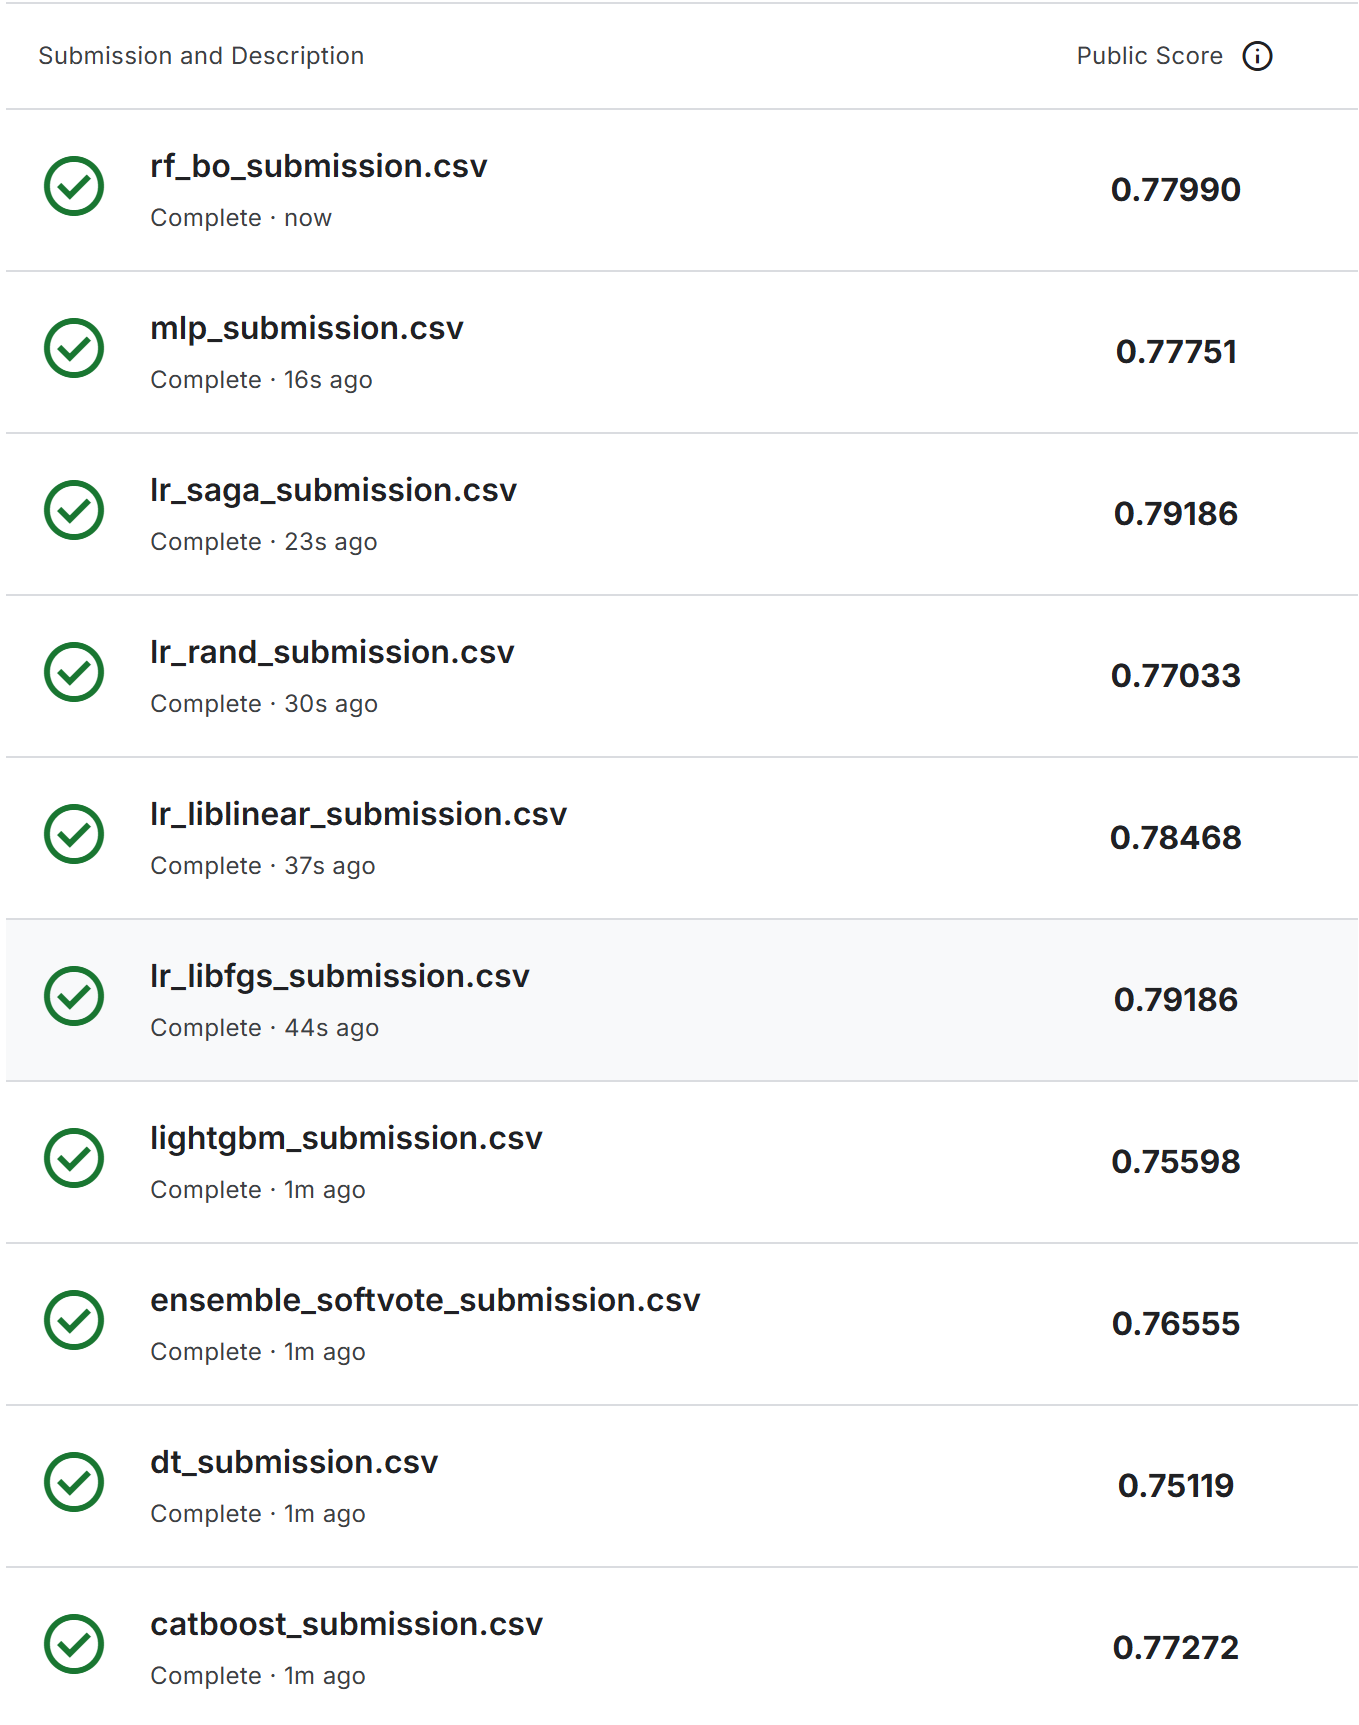
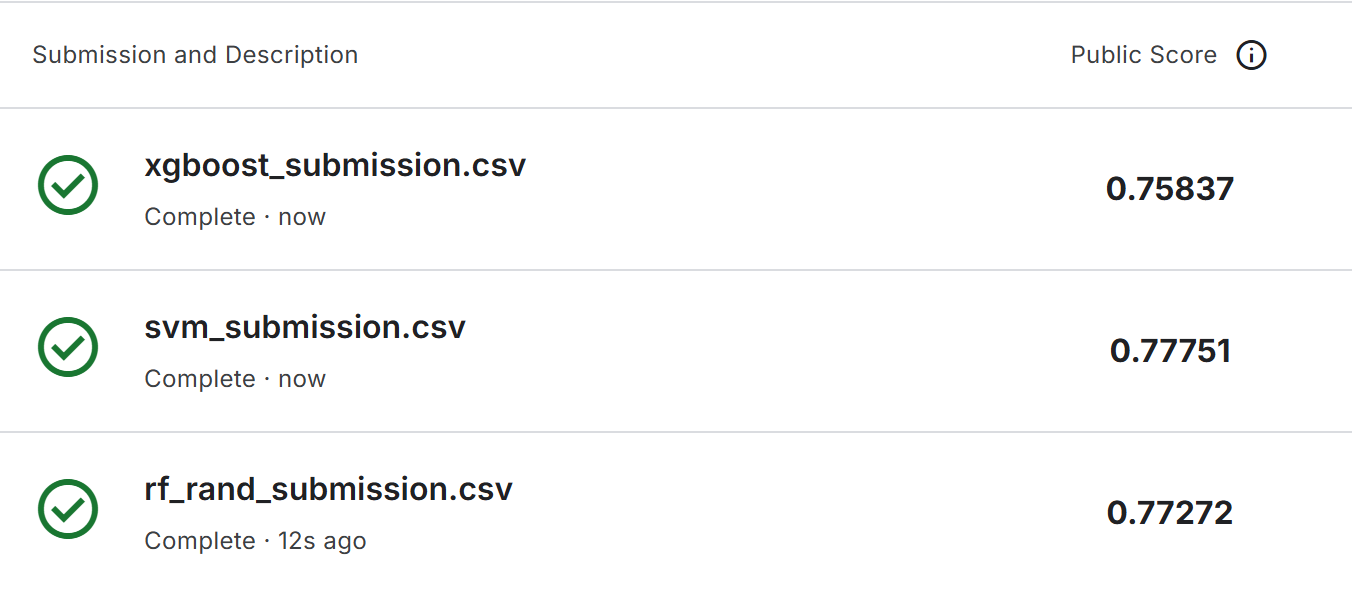